In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_ta as ta
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

nifty_data = pd.read_csv("nifty_data.csv")

nifty_data['Date'] = pd.to_datetime(nifty_data['Date'], format="%Y-%m-%d") 
nifty_data.set_index('Date', inplace=True)

nifty_data['SMA_50'] = nifty_data['Close'].rolling(window=50).mean()
nifty_data['SMA_200'] = nifty_data['Close'].rolling(window=200).mean()

nifty_data['EMA_12'] = nifty_data['Close'].ewm(span=12, adjust=False).mean()
nifty_data['EMA_26'] = nifty_data['Close'].ewm(span=26, adjust=False).mean()

nifty_data.ta.macd(close = 'Close', fast=12, slow=26, signal=9, append=True)

nifty_data.ta.rsi(close='Close', length=14, append=True)

nifty_data = nifty_data.iloc[200:]

new_index = pd.date_range(start=nifty_data.index.min(), end=nifty_data.index.max(), freq='B')
nifty_data = nifty_data.reindex(new_index)

In [20]:
X_nifty = nifty_data[['Close', 'SMA_50', 'SMA_200', 'RSI_14', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'EMA_12', 'EMA_26']]
y_nifty = nifty_data['Close']

X_train_nifty, X_test_nifty, y_train_nifty, y_test_nifty = train_test_split(X_nifty, y_nifty, test_size=0.2, shuffle=False)

print("X_train_nifty shape:", X_train_nifty.shape)
print("X_test_nifty_shape:", X_test_nifty.shape)
print("y_train_nifty_shape:", y_test_nifty.shape)
print("y_test_nifty_shape:", y_test_nifty.shape)

X_train_nifty shape: (2148, 9)
X_test_nifty_shape: (537, 9)
y_train_nifty_shape: (537,)
y_test_nifty_shape: (537,)


In [66]:
model_nifty = ARIMA(y_train_nifty, order = (0,1,0))
model_fit_nifty = model_nifty.fit()
print(model_fit_nifty)

In [67]:
forecast_nifty = model_fit_nifty.forecast(steps=len(y_test_nifty))
print(forecast_nifty)

2022-06-30    15799.099609
2022-07-01    15799.099609
2022-07-04    15799.099609
2022-07-05    15799.099609
2022-07-06    15799.099609
                  ...     
2024-07-15    15799.099609
2024-07-16    15799.099609
2024-07-17    15799.099609
2024-07-18    15799.099609
2024-07-19    15799.099609
Freq: B, Name: predicted_mean, Length: 537, dtype: float64


In [68]:
y_test_nifty.isnull().sum()
print("Number of NaNs in y_test_nifty:", y_test_nifty.isnull().sum())
print("First few values of forecast_nifty:", forecast_nifty.head())
print("First few index values of y_test_nifty:", y_test_nifty.index[:5])
print("First few index values of forecast_nifty:", forecast_nifty.index[:5])

y_test_nifty_dropped = y_test_nifty.dropna()
X_test_nifty_dropped = X_test_nifty.loc[y_test_nifty_dropped.index]
print(y_test_nifty_dropped)
print(X_test_nifty_dropped)

forecast_nifty_dropped = forecast_nifty[y_test_nifty_dropped.index]

Number of NaNs in y_test_nifty: 32
First few values of forecast_nifty: 2022-06-30    15799.099609
2022-07-01    15799.099609
2022-07-04    15799.099609
2022-07-05    15799.099609
2022-07-06    15799.099609
Freq: B, Name: predicted_mean, dtype: float64
First few index values of y_test_nifty: DatetimeIndex(['2022-06-30', '2022-07-01', '2022-07-04', '2022-07-05',
               '2022-07-06'],
              dtype='datetime64[ns]', freq='B')
First few index values of forecast_nifty: DatetimeIndex(['2022-06-30', '2022-07-01', '2022-07-04', '2022-07-05',
               '2022-07-06'],
              dtype='datetime64[ns]', freq='B')
2022-06-30    15780.250000
2022-07-01    15752.049805
2022-07-04    15835.349609
2022-07-05    15810.849609
2022-07-06    15989.799805
                  ...     
2024-07-12    24502.150391
2024-07-15    24586.699219
2024-07-16    24613.000000
2024-07-18    24800.849609
2024-07-19    24530.900391
Name: Close, Length: 505, dtype: float64
                   Close      

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_nifty = mean_squared_error(y_test_nifty_dropped, forecast_nifty_dropped)
mae_nifty = mean_absolute_error(y_test_nifty_dropped, forecast_nifty_dropped)

print("NIFTY ARIMA - MSE:", mse_nifty)
print("NIFTY ARIMA - MAE:", mae_nifty)

NIFTY ARIMA - MSE: 18469649.30060789
NIFTY ARIMA - MAE: 3739.739501469678


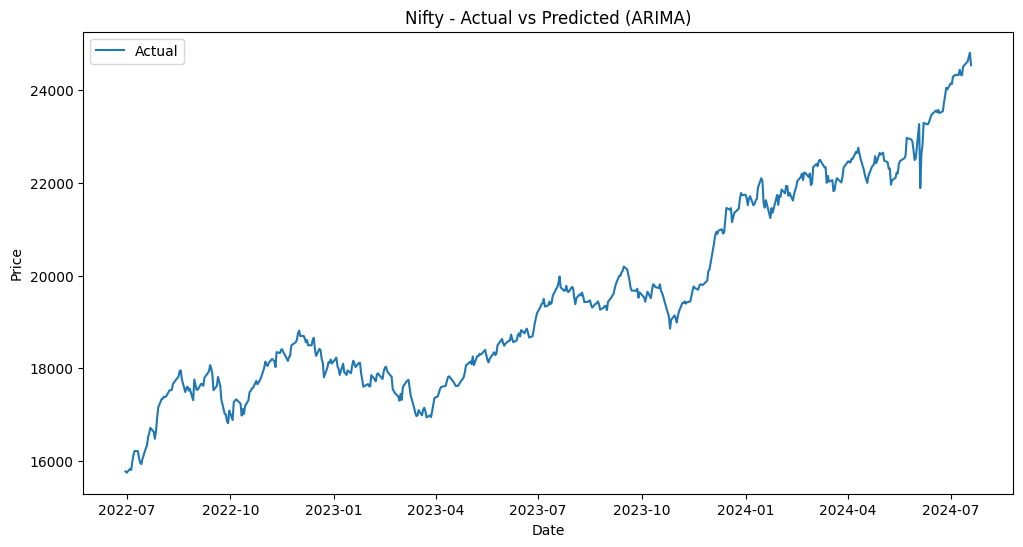

In [73]:
plt.figure(figsize=(12,6))
plt.plot(y_test_nifty_dropped.index, y_test_nifty_dropped, label = "Actual")
plt.title('Nifty - Actual vs Predicted (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

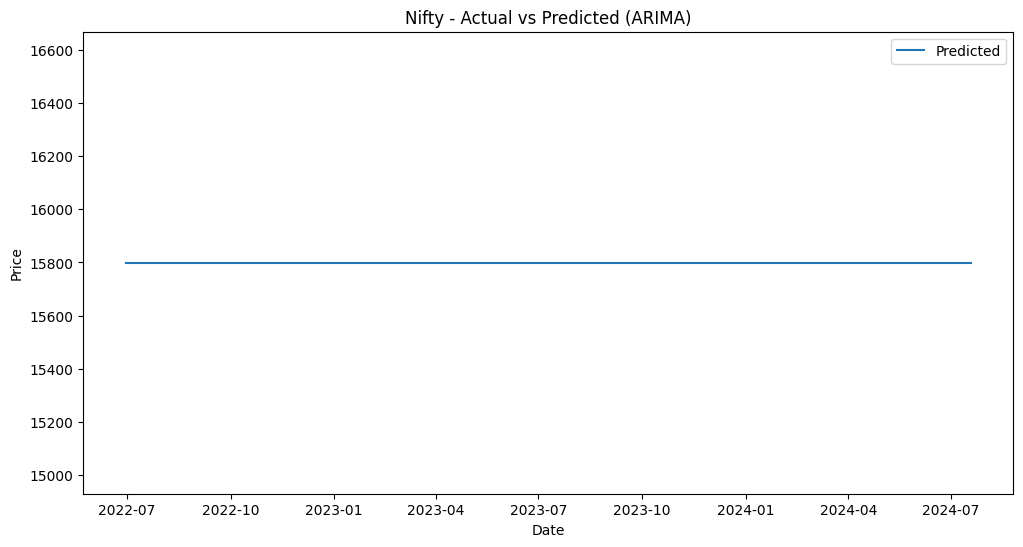

In [74]:
plt.figure(figsize=(12,6))
plt.plot(forecast_nifty_dropped.index, forecast_nifty_dropped, label = 'Predicted')
plt.title('Nifty - Actual vs Predicted (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

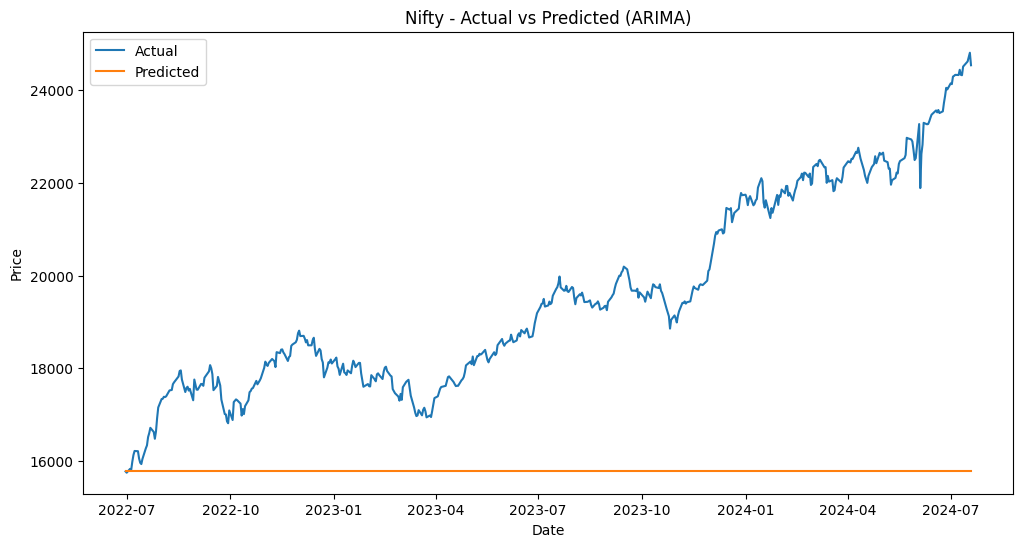

In [75]:
plt.figure(figsize=(12,6))
plt.plot(y_test_nifty_dropped.index, y_test_nifty_dropped, label = "Actual")
plt.plot(forecast_nifty_dropped.index, forecast_nifty_dropped, label = 'Predicted')
plt.title('Nifty - Actual vs Predicted (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()